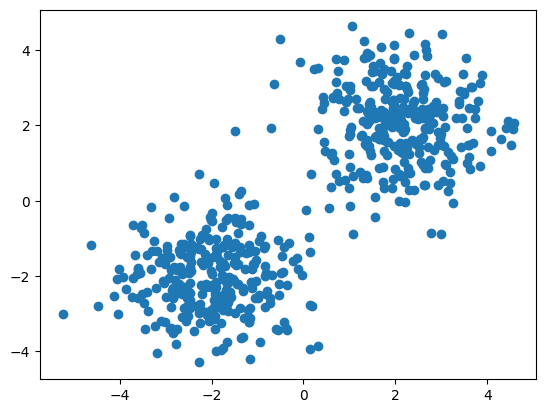

In [8]:
from utils import plot_svm_margins
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# simulate data
blobs = make_blobs([300,300],2,centers=[(-2,-2),(2,2)],random_state=42)[0]
plt.scatter(blobs[:,0],blobs[:,1])

<Axes: xlabel='X1', ylabel='X2'>

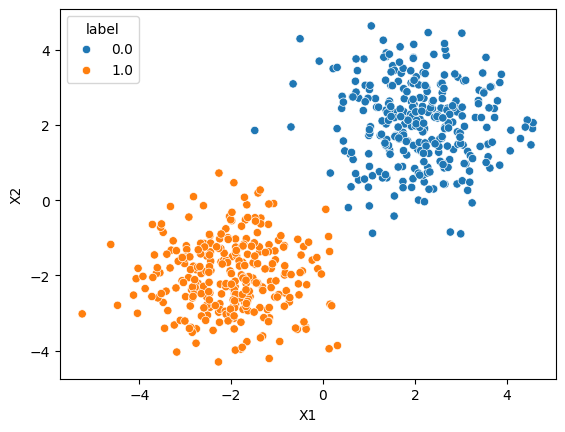

In [9]:
from sklearn.cluster import KMeans


kmean = KMeans(2)
kmean.fit(blobs)
blobs = np.c_[blobs, kmean.predict(blobs)]
df = pd.DataFrame(blobs, columns = ["X1", "X2", "label"])
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "label")


In [10]:
X, y = df.drop("label", axis = 1).to_numpy(), df["label"].to_numpy()

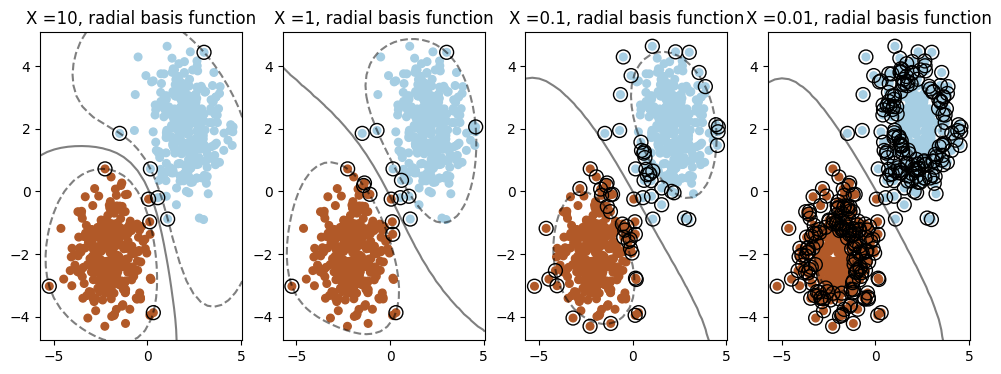

In [17]:
fig, ax = plt.subplots(1,4, dpi = 100, figsize = (12,4))

for i, C in enumerate([10,1, 0.1, 0.01], 1):
    plt.subplot(1,4,i)
    plot_svm_margins(SVC(kernel="rbf", C=C),X=X,y=y)
    ax[i-1].set(title=f"X ={C}, radial basis function")